<center> <h2> DS 3000 - Fall 2019</h2> </center>
<center> <h3> DS Report </h3> </center>


<center> <h3>What Makes a Great Batter?</h3> </center>
<center><h4>Jasper Angl, Sam Delfino, Tim Giancolo, Logan Jones</h4></center>


<hr style="height:2px; border:none; color:black; background-color:black;">

#### Executive Summary:

Our project focused on determining which individual player statistics have the greatest effect on their team's win success (i.e. what batting statistics best help the team win) and developing a model to help teams evaluate a player's importance to their success.

**Method:** We obtained player statistics dataset from Fangraphs, and the team winning percentage dataset from Lahman's database. The dataset gave us 18 initial independent variables, and we gained another 30 after one-hot encoding the team column. We tested hypotheses of the significance of player statistics on win percentage and created machine learning models to predict win category. 

**Results:** After data exploration, we found that no significant statistic that is a determinant of win percentage. We created models for four different machine learning algorithms, and found that the linear Support Vector Machine classifier had the best performance, correctly classifiying 39.35% of players into the correct win percentage category.

**Discussion:** In future work, we could try to see the trend of player data to the player's team's growing success. If a player's data is significantly increasing while their team is trending successfully, that statistic could lead to team success. 

<hr style="height:2px; border:none; color:black; background-color:black;">

## Outline
1. <a href='#1'>INTRODUCTION</a>
2. <a href='#2'>METHOD</a>
3. <a href='#3'>RESULTS</a>
4. <a href='#4'>DISCUSSION</a>

<a id="1"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 1. INTRODUCTION

<h3>Problem Statement & Significance of the Problem</h3>

There have been more home runs hit in the previous 2019 season than any other season. Players like Mike Trout, Cody Bellinger, and Pete Alonso were hitting 40+ home runs in a single season. All of these players hit some of the most home runs in a season, but none of them were on the team that won the World Series. Pete Alonso hit 53 home runs in the 2019 season, the most for that season and his team went 86-76, barely having a winning record. These statistics beg the question: are big sluggers who hit a lot of home runs more beneficial to a team’s success than a solid player that probably has a higher batting average, meaning they get hits more often. 

We would like to find out not only whether home runs and or a high batting average lead to greater team success, but also include 15 more statistics about each MLB batter from the last decade to detect which statistics are truly influential in the team’s success. This data will enable a team to make more decisive and better decisions in terms of player acquisition trades and would allow a team to train their batters to play the most efficient batting style for team success. Not only will teams be able to know which statistics are most significant but they will also be able to predict their team’s win percentage by virtually adjusting their roster to potential other players that they want to trade for and see how much of an impact they can make and whether they are worth the investment of hundreds of thousands of dollars. 

Typically previous research has mainly focussed on predicting the outcome of a specific game such as (Soto-Valero, 2016) [publication](https://www.researchgate.net/publication/311862823_Predicting_Win-Loss_outcomes_in_MLB_regular_season_games_-_A_comparative_study_using_data_mining_methods) or a Towards Data Science [article](https://towardsdatascience.com/predicting-mlb-game-outcomes-with-machine-learning-594eac9484e9 "Roger Pharr's MLB Predictor") from Roger Pharr. Although other research or models may exist, they are not public. The MLB teams want to keep a competitive edge over other teams, for example, with their statistics and research team. While teams like the Yankees or Red Sox may have also developed a similar model as we have, none of them published their analyses or software to gain a possible advantage over other teams.

Pharr, Roger (2019). Predicting MLB Game Outcomes with Machine Learning. *Towards Data Science* 


Soto-Valero, César. (2016). Predicting Win-Loss outcomes in MLB regular season games – A comparative study using data mining methods. *International Journal of Computer Science in Sport*. 15. 91-112. doi:10.1515/ijcss-2016-0007.

<h3>Questions/Hypotheses</h3>

   Given the aforementioned problem of objectively determining what makes a good player, the question central of this analysis is the following: what player statistics are most relevant in predicting that player’s team’s success during a season? From this question, we hope to develop a machine learning model that is able to reasonably predict how well a player’s team might do during a season based on their statistics, and whose parameters provide insights on the relative importance of different player statistics in determining what makes a “good” player. Our model will be developed through an iterative process of feature extraction, hyperparameter tuning, and comparison across predictors until we reach a point where we have the greatest test performance given our finite set of data. This process will also involve comparison across different machine learning algorithms to determine the best performing model.

   Because of our skepticism of the true value of “flashy” statistics like home runs and even runs batted in (RBIs), we hope to answer: are these statistics really important in determining what makes a good player, and will they actually lead to that player’s team’s success? What player statistics are overlooked by scouts, the media, and fans? What general recommendations can we provide to organizations looking to identify those players most likely to aid their success?

   In pursuit of these answers, for each of the 18 player statistics (features) in the dataset, we will ask the question: "Is this feature significant in determining a player's team's success, as measured by that player's team's winning percentage during a season?" In order to test these 18 separate hypotheses, we will conduct a correlation analysis, determining which variables are significantly correlated with a team's winning percentage, at an alpha level of .05.


<a id="2"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 2. METHOD

### 2.1. Data Acquisition

Player statistics were obtained from Fangraphs (a popular sabermetric data source):             https://www.fangraphs.com/leaders.aspx?pos=all&stats=bat&lg=all&qual=10&type=8&season=2019&month=0&season1=2009&ind=1&team=&rost=&age=&filter=&players=&startdate=&enddate=&page=1_50

Team statistics were obtained from Lahman’s database: http://www.seanlahman.com/baseball-archive/statistics/

Both were easily downloadable as csv's from their websites, and no scraping was required. Both dataframes were joined to create the data utilized in our analyses. Our data is stored in a GitHub repository: https://github.com/timmyg2034/DS3000-Baseball-Project/blob/master/data_full_clean.csv

Each row in our data represents a professional baseball player during a specific season. Each row contains 19 features for each player. 18 of the features are player statistics, which are continuous variables, and the last feature is the player's team (categorical) which we will one-hot encode for analyses. The target variable of interest is the player's team's success during the given season, as measured by the player's team's winning percentage. Data were selected for the past 11 seasons, for a total of 7095 individual records, representing players during a specific season and data on their individual statistics and team's success. The data includes multiple records of the same players across multiple seasons, but since each of these players and their seasons have their own individual winning percentages, there are no concerns of duplicated data; in fact, identical players with different statistics and different success rates across seasons are a useful means of comparing the impact of individual player statistics on success, controlling for the players themselves.

### 2.2. Variables

Independent variables (features):
- Team: player's team (will be one-hot encoded into 30 new binary features)
- PA: plate appearances
- HR: Homeruns
- R: Runs
- RBI: Runners batted in
- SB: Stolen bases
- BB%: Walk rate
- K%: Strikeout rate
- ISO: Isolated power
- BABIP: Batting average on balls in play
- AVG: Batting average
- OBP: On-base percentage
- SLG: Slugging percentage
- wOBA: Weighted on-base average
- wRC+: Weighted runs created plus
- BsR: Base runs
- Off: Offensive runs above average
- Def: Defensive runs above average
- WAR: Wins above replacement

Dependent variable:
- Win_Percentage: Percent of total games won by player's team

Win_Percentage will be converted to a categorical variable Win_Category, which will be the target variable for machine learning algorithms (see below for justification and description).

### 2.3. Data Analysis
Our predictive model will initially include all 18 of the continuous independent variables / features contained in our dataset, and we will add an additional 30 features by one-hot encoding the Team column, for a total of 48 features. Through our exploratory analyses, hypotheses tests, and feature extraction processes, we expect to reduce the number of features in our model―the extent of this reduction is unknown before actual analysis, but we will choose features in a way that balances our model’s predictive power and interpretability. 

Despite our possession of a large dataset with many features of interest, it is unlikely that any model will be able to reasonably predict a player's team's exact winning percentage based on their statistics. Rather, it is more reasonable to simply consider "levels" or "degrees" of a team's success rather than their exact winning percentage. To do this, we will create a new target variable from the previous win percentage column that classifies a team's success into one of five groups (1,2,3,4,5), with 1 representing a less successful team and 5 representing a more successful team. Exact sizes of each of these categories (which win percentage ranges they cover) will be determined during the data exploration section, so that bin sizes are informed by the characteristics of the data they contain. Teams will be placed in the categories based on their win percentage, so the model is still well-tied to the prediction of a player's team's success, but the creation of a categorical target variable allows for a more effective model. Ultimate success in baseball is usually considered to be a World Series win, which isn’t guaranteed to be the team with the most wins. For the purposes of our analysis, however, we decided that a categorical variable well-tied to a team’s success, like win percentage category, is far superior to a binary variable like a World Series win that doesn’t give justice to successful teams that didn’t win the World Series. 

Given that we are simply hoping to predict the one categorical value (win category) using 48 feature variables, this is a supervised learning problem, specifically a classification problem. The specific algorithm that we will ultimately use in our final model is indeterminate before our analysis, but we plan to do a thorough comparison of various classification algorithms, including the k-Nearest Neighbor classifier, the Naive Bayes classifier, Support Vector Machines, and Decision Trees. The k-Nearest Neighbor classifier is simple but often effective in performance and benefitted by its interpretability. Our dataset has a total of 48 initial features, which is relatively high and would be less effective with kNN, but it is likely that the total number of features will be largely reduced during the feature selection process, making kNN more appropriate. During hyperparameter tuning, we will be adjusting the number of neighbors in the kNN algorithm in order to optimize performance. The Naive Bayes classifier is faulty in this case due to its assumption that features are independent (individual player statistics are not independent), but in practice, it is often useful despite this assumption. Because of this, we will consider the Gaussian Naive Bayes classifier in our model comparison. The Support Vector Machine is intuitively appropriate for this analysis given its ease of use on larger datasets with many features. We will be tuning the C parameter (regularization) for the linear SVC model, which will allow us to compare multiple SVMs by complexity in order to optimize performance. The Decision Tree classifier is benefitted by its generally positive performance on datasets with multiple feature types, but it is questionable whether the model will generalize well with our data. We will be tuning the tree depth and the minimum number of samples required to split an internal node in order to optimize performance.

Features for the models will be selected in a way that balances complexity with interpretability, and model parameters will be tuned to optimize performance and minimize overfitting. From this process of feature selection, model comparison, and optimization, we hope to answer the question: which machine learning algorithm is best able to classify a player's team's success into performance groups based on their individual statistics, and what do the parameters of this model say about the relative importance of certain statistics? The focus on model performance is tied to the need to effectively quantify a player's contribution to their team based on their individual statistics. Our final model will be fitted in a way that values certain statistics over others, and a well-performing model will be able to support a team in their efforts to select players based on the statistics that objectively matter most for their ultimate goal: winning.

<a id="3"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 3. RESULTS

### 3.1. Data Wrangling

Data was filtered to only include players who played more than 50 games in a season since a player with under 50 games played in a season is mostly irrelevant to a team's success.

In [4]:
# read in data
import pandas as pd
url = "https://raw.githubusercontent.com/timmyg2034/DS3000-Baseball-Project/master/data_full_clean.csv?token=AJEL232IMIQQ62N6JXL4LIK6UBWQS"
data = pd.read_csv(url)

# filter for players with greater than 50 games
data = data[data['G_x'] > 50]
data.shape

(3963, 32)

In [5]:
# function to convert percentage cells to floats
def pctToDec(cell):
    newCell = cell.replace('%',"")
    return float(newCell) / 100

# convert bb% and k% columns to float proportions
data['BB%'] = data['BB%'].map(pctToDec)
data['K%'] = data['K%'].map(pctToDec)

In [6]:
# one-hot encode team column - feature extraction
from sklearn.preprocessing import OneHotEncoder
new_df = data["Team"].values.reshape(-1,1)
encoder = OneHotEncoder(sparse = False)
encoded_df = encoder.fit_transform(new_df)
new_features_df = pd.DataFrame(encoded_df, columns = encoder.get_feature_names())

In [7]:
# split data into features and target
features = pd.concat([data.iloc[:,4:22].reset_index(drop=True), new_features_df.reset_index(drop=True)], axis=1)
target = data['Win_Percentage']

# all features and target in one dataframe (for correlation analysis)
full_data = pd.concat([features.reset_index(drop=True), target.reset_index(drop=True)], axis=1)

# split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=3000)

In [8]:
# scale data
from sklearn.preprocessing import MinMaxScaler

# create, fit, and apply min max scaler
scaler = MinMaxScaler()
scaler.fit(X_train) 
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


To begin the process of feature selection, we conducted a correlation analysis between each individual player
statistic and the outcome winning percentage variable to determine which continuous variables might be significantly correlated with the dependent variable (team success measured by win percentage).

In [9]:
from scipy import stats

# loop through features to test the hypothesis that they are significant on the dependent variable (win %)
# return correlation coefficients and p-values for both Pearson and Spearman tests
for column in full_data.columns[:18]:
    pR, pP = stats.pearsonr(data[column], data["Win_Percentage"])
    sR, sP = stats.spearmanr(data[column], data["Win_Percentage"])
    print(column, ":", "\n\tPearson correlation coefficient: ", pR, "\t p-value:", pP)
    print("\tSpearman correlation coefficient: ", sR, "\t p-value:", sP)

PA : 
	Pearson correlation coefficient:  0.09553113317515718 	 p-value: 1.6827660310753595e-09
	Spearman correlation coefficient:  0.09652986358712666 	 p-value: 1.1355455480016823e-09
HR : 
	Pearson correlation coefficient:  0.15141012615943883 	 p-value: 9.343065045822897e-22
	Spearman correlation coefficient:  0.14603074290114773 	 p-value: 2.4730465082585647e-20
R : 
	Pearson correlation coefficient:  0.17898795309703308 	 p-value: 6.92599215532247e-30
	Spearman correlation coefficient:  0.1644402512857274 	 p-value: 2.0171467313574953e-25
RBI : 
	Pearson correlation coefficient:  0.17058417460284753 	 p-value: 2.9343312895192564e-27
	Spearman correlation coefficient:  0.16114412512293047 	 p-value: 1.826225845927259e-24
SB : 
	Pearson correlation coefficient:  0.020946833964769186 	 p-value: 0.18737602224642494
	Spearman correlation coefficient:  0.04453905825584958 	 p-value: 0.005041875886456301
BB% : 
	Pearson correlation coefficient:  0.13164712884601146 	 p-value: 8.713493031

We conducted Pearson and Spearman correlation tests between each player statistic (continuous independent variables) and the player's team's winning percentage (continuous dependent variable) to get a better idea of which independent variables are significantly correlated with a team's success. At an alpha value of .05, only SB (stolen bases) is significantly correlated with winning percentage (only by the Pearson test) and BABIP (batting average on balls in play) is close to significant (p = .045). This means that there is a less than 5% chance that the co-movement of a player's stolen bases and their team's success is caused by chance―a statistic that rejects the null hypothesis that stolen bases do not affect a team's success. From these findings there are no variables that we would definitively consider necessary for the analysis (besides stolen bases), so we will use model-based feature selection to initially select variables (under a median threshold) that will potentially be useful during model creation.

In [15]:
# model-based feature selection
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeRegressor

# use the decision tree regressor to select the most important features under a median threshold
select = SelectFromModel(DecisionTreeRegressor(random_state=3000), threshold='median')
select.fit(X_train_scaled, y_train)
mb_features = list(features.columns[select.get_support()])
mb_features

['PA',
 'HR',
 'R',
 'RBI',
 'SB',
 'BB%',
 'K%',
 'ISO',
 'BABIP',
 'AVG',
 'OBP',
 'SLG',
 'wOBA',
 'wRC+',
 'BsR',
 'Off',
 'Def',
 'WAR',
 'x0_Astros',
 'x0_Cardinals',
 'x0_Dodgers',
 'x0_Marlins',
 'x0_Orioles',
 'x0_Yankees']

### 3.2. Data Exploration

Text(0, 0.5, 'Count')

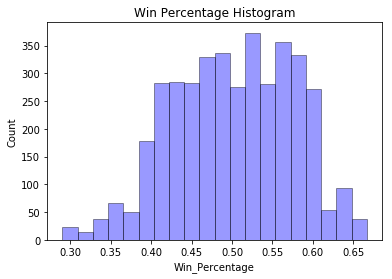

In [16]:
# create histogram of win percentages from the data

# import relevant modules
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# set histogram parameters
ax = sns.distplot(data['Win_Percentage'], hist=True, kde=False, 
            bins=round(len(data['Win_Percentage'])/200), color = 'blue', 
             hist_kws={'edgecolor':'black'})

# set titles
ax.set_title('Win Percentage Histogram')
ax.set_ylabel('Count')

The win percentage histogram displays the distribution of the win percentage into 20 bins.  This shows that there is a normal distribution of the win percentage, skewed slightly to the right.  The most win percentages is around 53%.  This histogram will allow for us to better categorize the percentages into formal, evenly distributed categories. 

In [17]:
# 1 = [0 - .42]
# 2 = (.42 - .47]
# 3 = (.47 - .535]
# 4 = (.535 - .58]
# 5 = (.58 - 1]
def categorizeWinPct(pct):
    # convert win percentage (DV) column to categories of win percentage
    if pct > .58:
        return 5
    elif pct > .535:
        return 4
    elif pct > .47:
        return 3
    elif pct > .42:
        return 2
    else:
        return 1

# create new win category column (for final model categorization)
full_data['Win_Category'] = full_data.Win_Percentage.map(categorizeWinPct)

/Applications/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'Count')

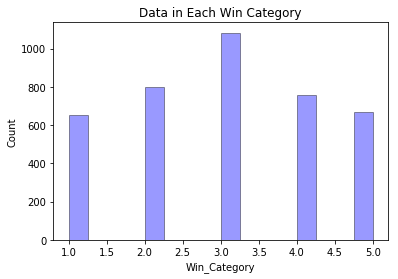

In [18]:
# create barplot of win categories and their count in the data

# set barplot parameters
ax = sns.distplot(full_data['Win_Category'], hist=True,  kde=False, color = 'blue', hist_kws={'edgecolor':'black'})

# set titles
ax.set_title('Data in Each Win Category')
ax.set_ylabel('Count')

The histogram above displays the distribution of the win percentages in each category. The histogram appears normally distributed which is a desired distribution since it reflects the original distribution of win percentages as shown in the above histogram. In addition, higher and lower win percentages are well accounted for in the 1st and 5th win categories, ensuring that there will be a sufficient amount of data for training in each category. 

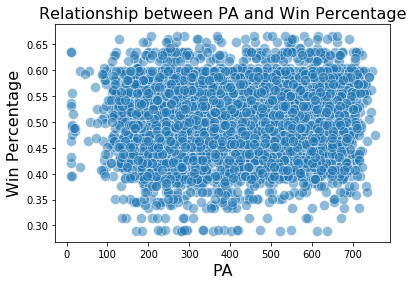

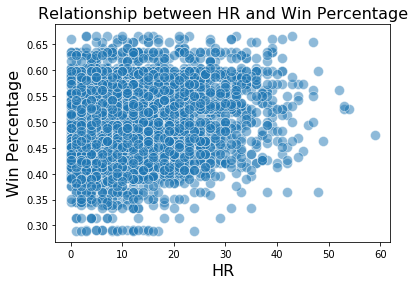

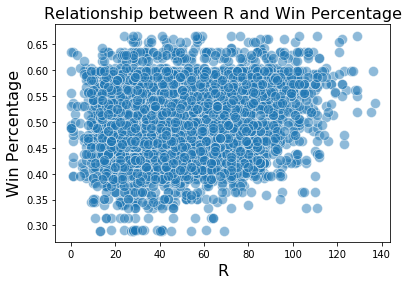

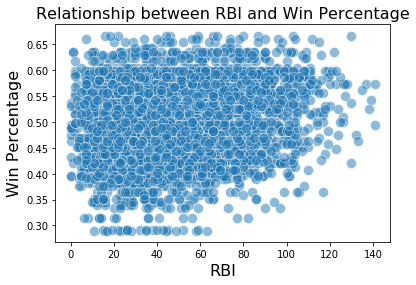

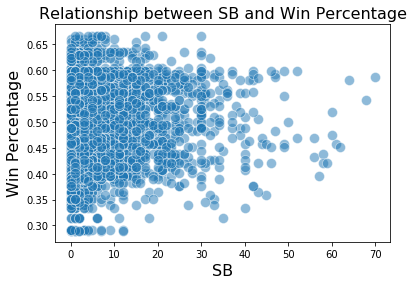

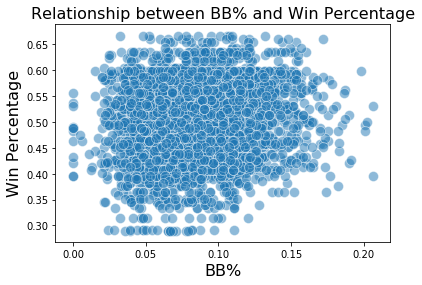

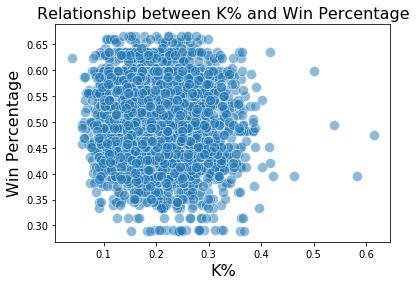

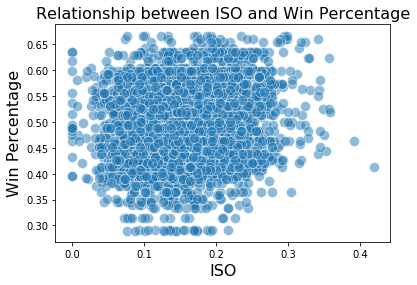

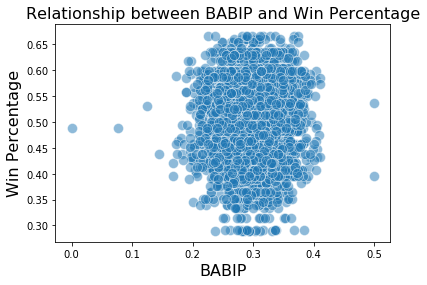

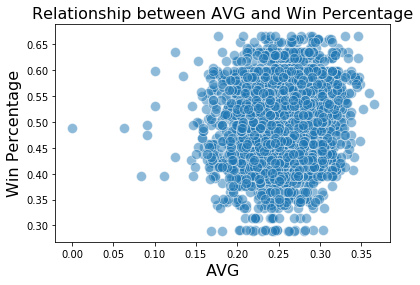

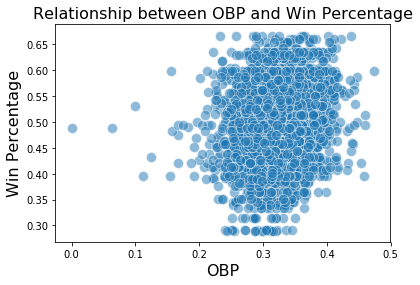

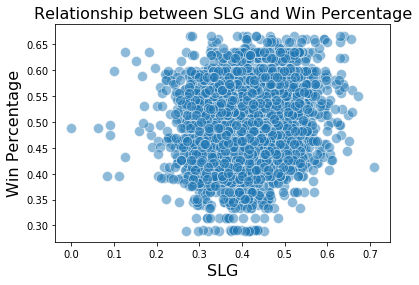

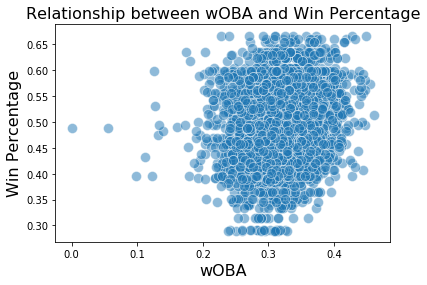

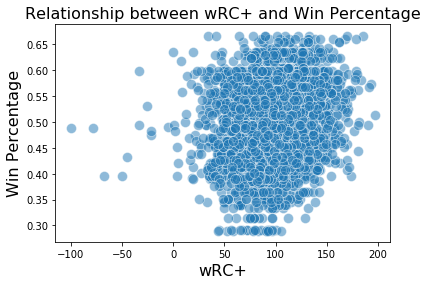

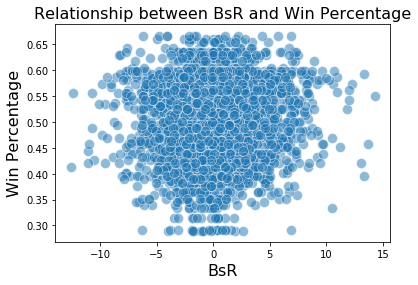

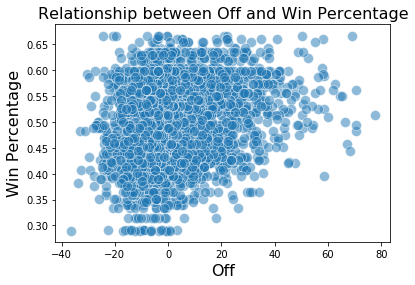

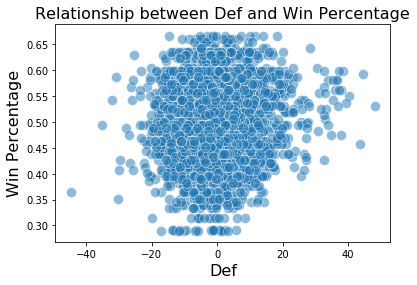

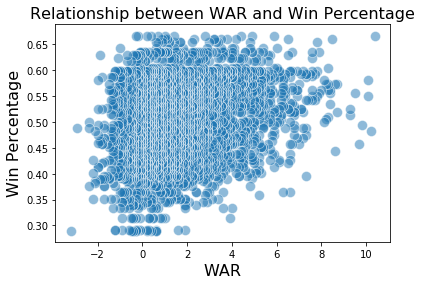

In [19]:
# create scatterplots for each of the continuous player statistics and win percentage

# loop through each of the continuous player statistics and create scatterplot with win percentage
for x in mb_features[0:18]:
    plt.figure()
    # create and display the scatter plot
    graph = sns.scatterplot(x=x, y="Win_Percentage", data = data, s=100, alpha=.5)

    # specify the title
    title = "Relationship between {} and Win Percentage".format(x)

    # set the title of the plot
    graph.set_title(title, size = 16)

    # add labels to the axes  
    graph.set_xlabel(x, size = 16)
    graph.set_ylabel("Win Percentage", size = 16)

The graphs above show the relationships between the individual features and the target statistics.  The features were already filtered to only display the most important statistics.  All of the graphs show that there is no trend between the player statistics and their winning percentages.  The statistics are widely spread along the graph showing that there is no difference between a player having a higher statistic and a player having a lower statistic and their winning percentage.  This means that there is a probability that there is no deteremining a player's specific skillset or a specific statistic is a determinant of their success or winning percentage.  There are some graphs where the data is grouped in the middle, like the defense (Def) or batting average for balls in play (BABIP), among other graphs, because the majority of players have very similar rates for those statistics.  There isn't as much of a variation of the statistics, unlike wins above replacement (WAR). For BABIP, most players stay in a range between 0.2 and 0.4, while player's WAR can range from -2 to 10.  Either way, the data is spread consistently vertically for every graph, showing the ranges of the statistics can vary, but there is no relationship between the features and the target value.  

The reason that the win percentage was used as the target in this display instead of the win categories was because the graphs were already binned so the data points were spread across the x-axis of the graphs, but the y-values of the data points were the values of the bins.  This created horizontal lines across each graph.  

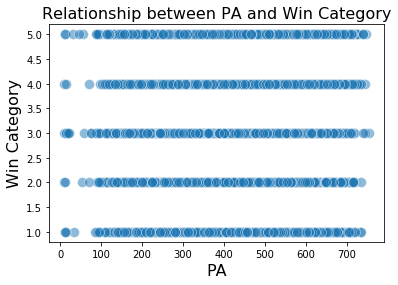

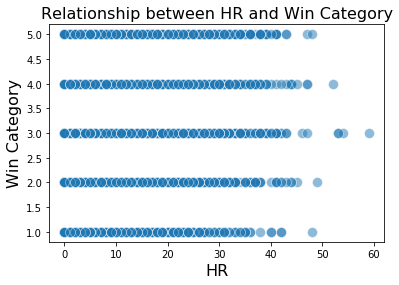

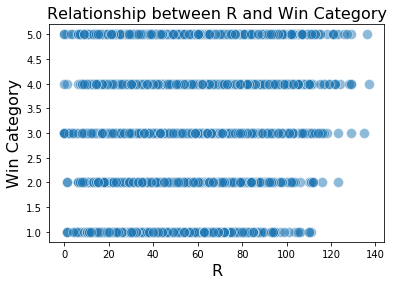

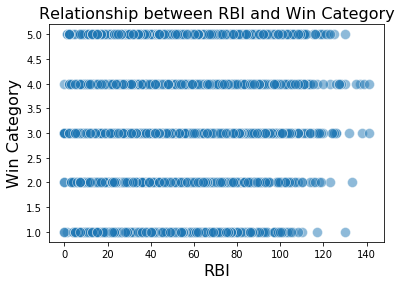

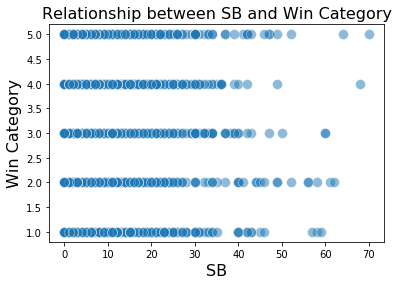

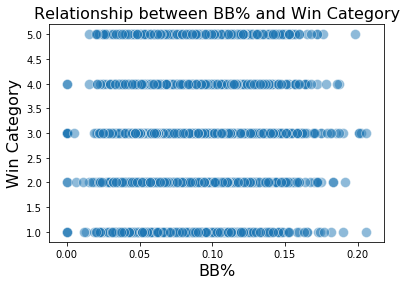

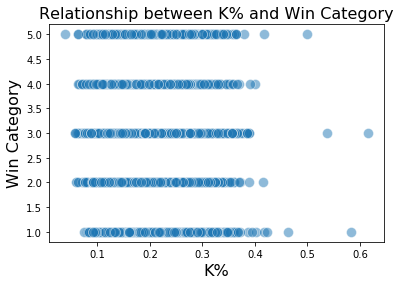

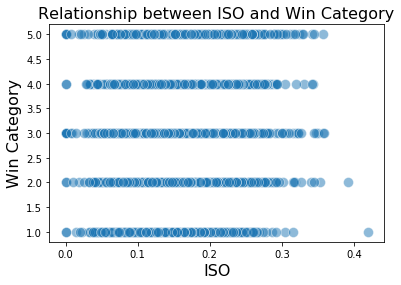

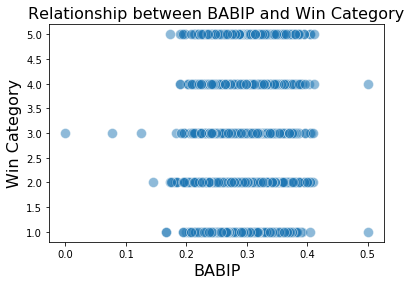

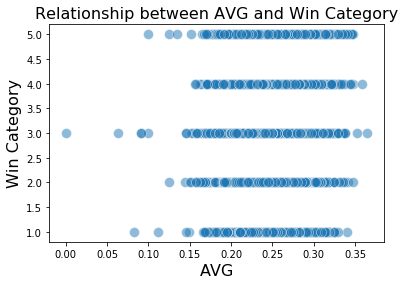

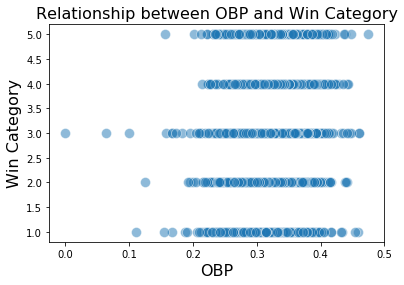

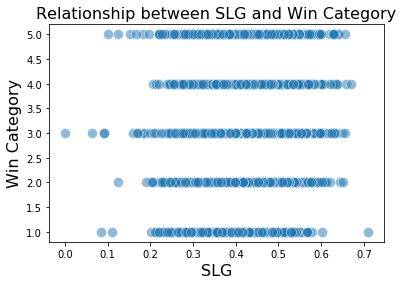

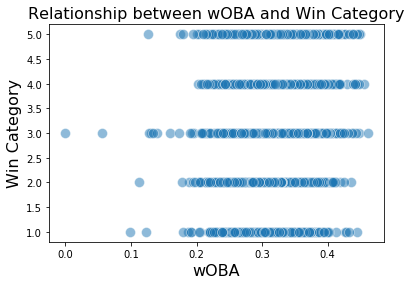

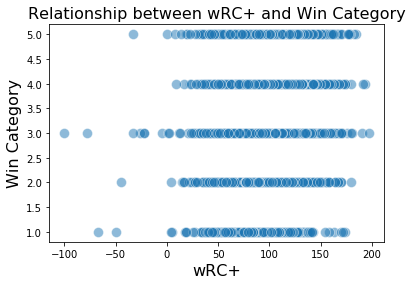

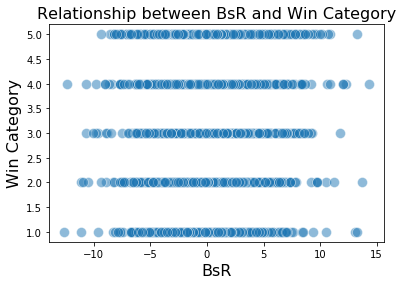

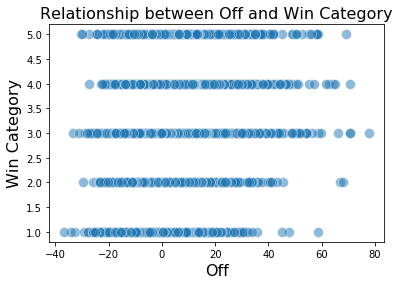

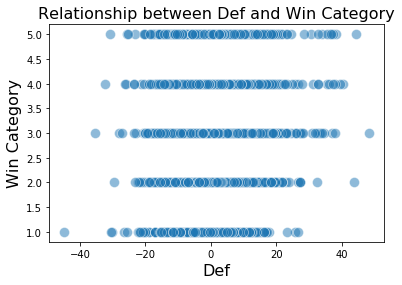

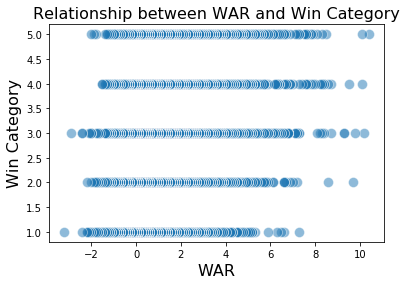

In [20]:
# create scatterplots for each of the continuous player statistics and win category

# loop through each of the continuous player statistics and create scatterplot with win category
for x in mb_features[0:18]:
    plt.figure()
    # create and display the scatter plot
    graph = sns.scatterplot(x=x, y="Win_Category", data = full_data, s=100, alpha=.5)

    # specify the title
    title = "Relationship between {} and Win Category".format(x)

    # set the title of the plot
    graph.set_title(title, size = 16)

    # add labels to the axes  
    graph.set_xlabel(x, size = 16)
    graph.set_ylabel("Win Category", size = 16)

The graphs show all of the features compared to the Win Category, which will be the target value for the models shown below.  Since the data is already put into categoryies, the y-values of the data points are only graphed along the bin values.  All of the graphs display the feature values being varied within each bin and evenly distributed within each bin.  Since the bins are separated by the player's win percentages and the data is evenly spread throughout the bins, players with high win percentages can have low statistics and vice versa.  There, ultimately, is no significant value or statistics that are determinants of win percentage/category.  

### 3.3. Model Construction

We will use the features gathered from our model-based feature selection for the construction of models. This includes all 18 player statistics and 6 team dummy variables created from one-hot encoding the original Team column. Since our model is a classifier of a team's winning percentage category, we will update the target variable to be the Win_Category column, which has been sizes informed by the exploratory analysis section and visualizations. We will once again split the data with the new target variable into training and testing sets and scale the appropriate features, ultimately creating four models based on the following four machine learning algorithms: k-Nearest Neighbor classifier, the Naive Bayes classifier, Support Vector Machines, and Decision Trees. From the performance of these models under a cross-validation approach, we will select the best performing model(s) for further parameter tuning and testing to determine which is superior, in order to have the best possible model that will allow scouts, organizations, and team managers to better understand how important a given player can be to their team's success.

In [111]:
# import classifiers
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [52]:
# create target variable (features have already been created)
target = full_data['Win_Category']

In [53]:
# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=3000)

# scale new data
scaler.fit(X_train) 
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [54]:
# create dictionary of fitted estimators for evaluation loop
fitted_estimators = {
    'k-Nearest Neighbor': KNeighborsClassifier().fit(X=X_train_scaled, y=y_train), 
    'Support Vector Machine': LinearSVC(max_iter=1000).fit(X=X_train_scaled, y=y_train),
    'Gaussian Naive Bayes': GaussianNB().fit(X=X_train_scaled, y=y_train),
    'Decision Tree': DecisionTreeClassifier().fit(X=X_train_scaled, y=y_train)}

### 3.4. Model Evaluation

Each of the four models are fitted, so we will evaluate each using a cross-validation approach with 5 folds.

In [110]:
# import modules for cross-validation and reporting
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

In [55]:
# create folds
kfold = KFold(n_splits=5, random_state=3000, shuffle=True)
    
# loop through fitted estimators
for estimator_name, estimator_object in fitted_estimators.items():
    
    # calculate performance for each fold
    scores = cross_val_score(estimator=estimator_object, X=features, y=target, cv=kfold)
    
    # print results of model performance and classification report
    print(estimator_name + ": \n\t" + f'mean accuracy={scores.mean():.2%}, ' + f'standard deviation={scores.std():.2%}' +"\n")

k-Nearest Neighbor: 
	mean accuracy=22.26%, standard deviation=0.43%



/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number o

Support Vector Machine: 
	mean accuracy=31.19%, standard deviation=7.01%

Gaussian Naive Bayes: 
	mean accuracy=31.85%, standard deviation=1.11%

Decision Tree: 
	mean accuracy=27.48%, standard deviation=1.20%



From the cross-validation results of classification accuracy, it appears that the Gaussian Naive Bayes classifier has the best initial results, with a mean win category classification accuracy of 31.85% across all 5 folds. It is closely followed, however, by the Support Vector Machine classifier (31.19%, although the standard deviation is a high 7.01%), the Decision Tree (27.48%), and the k-Nearest Neighbor classifier (22.26%). Given that the performance of each classifier is likely to change after hyperparameter tuning, it is worth considering all four models for further tuning and testing in order to determine the best classification algorithm.

### 3.5. Model Optimization
Since all four models performed reasonably similarly during model evaluation, we will now tune their parameters in order to optimize performance and prevent overfitting. There are no parameters to tune for the Gaussian Naive Bayes classifier, so we will simply refer to its cross-validation performance of 31.85% during training. For the Decision Tree, we will tune the min_samples_split and max_depth parameter in order to optimize the depth of the tree to maximize classification performance. For the k-Nearest Neighbors classifier, we will tune the n_neighbors parameter to select the number of neighbors that leads to this model's best performance. For the Linear SVM classifier, we will tune the C parameter in order to find the level of complexity that is best for the models performance. All tuning will be conducted using cross-validation grid search so the parameter performance comparisons are thorough (all combinations of parameters in the given ranges will be considered). Once tuned, we will compare all models' performances and determine the superior classifier of a player's team's winning category based on their final test performances.

In [109]:
# import modules necessary for grid search and list sequence creation
from sklearn.model_selection import GridSearchCV
import numpy as np

In [98]:
# tune decision tree parameters (max_depth and min_samples_split)

# create parameter grid and instantiate grid search
param_grid = {"max_depth":np.arange(1,25,1), "min_samples_split":[2, 10, 100, 200, 500, 1000]}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)

# fit the grid search object on the training data (CV will be performed on this)
grid_search.fit(X=X_train_scaled, y=y_train)

# return cross-validation training performance
print("Best cross-validation score: ", grid_search.best_score_)

# return best parameters for grid search
print("Best parameters: ", grid_search.best_params_)

Best cross-validation score:  0.3472409152086137
Best parameters:  {'max_depth': 19, 'min_samples_split': 200}


It appears that the Decision Tree classifier performs best at a maximum depth of 19 and minimum samples split of 200, where it correctly classifies 34.72% of winning categories across all 5 cross-validation folds.

In [85]:
# tune knn parameter (n_neighbors)

# create parameter grid and instantiate grid search
param_grid = {"n_neighbors":np.arange(1,25,1)}
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

# fit the grid search object on the training data (CV will be performed on this)
grid_search.fit(X=X_train_scaled, y=y_train)

# return cross-validation training performance
print("Best cross-validation score: ", grid_search.best_score_)

# return best parameters for grid search
print("Best parameters: ", grid_search.best_params_)

Best cross-validation score:  0.3728129205921938
Best parameters:  {'n_neighbors': 22}


It appears that the k-Nearest Neighbors classifier performs best with 22 neighbors, where it correctly classifies 37.28% of winning categories across all 5 cross-validation folds.

In [88]:
# tune decision linear svc parameter (C)

# create parameter grid and instantiate grid search
param_grid = {"C":[1,10,100,200,500]}
grid_search = GridSearchCV(LinearSVC(random_state=3000, max_iter=10000), param_grid, cv=5)

# fit the grid search object on the training data (CV will be performed on this)
grid_search.fit(X=X_train_scaled, y=y_train)

# return cross-validation training performance
print("Best cross-validation score: ", grid_search.best_score_)

# return best parameters for grid search
print("Best parameters: ", grid_search.best_params_)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number o

Best cross-validation score:  0.40746971736204574
Best parameters:  {'C': 200}


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


It appears that the linear Support Vector Machine classifier performs best with a C value of 200 (relatively high complexity), where it correctly classifies 40.75% of winning categories across all 5 cross-validation folds.

### 3.6. Model Testing

We will now test all four classifiers on the assigned testing data in order to determine the best performing model for predicting a player's team's win category. We will also include classification reports for each of the four models to get a better idea of their performance across different categories, in terms of precision, recall, and F1 scores.

In [108]:
# import classification report module
from sklearn.metrics import classification_report

In [102]:
# test gaussian naive bayes classifier

# create classifier
gnb = GaussianNB().fit(X=X_train_scaled, y=y_train)

# fit the model to the training data
gnb.fit(X=X_train_scaled, y=y_train)

# make predictions on the test set
predicted = gnb.predict(X=X_test_scaled)

# create classification report
class_report = classification_report(y_true=y_test, y_pred=predicted)

# return training and test scores
print("Prediction accuracy on the training data:", format(gnb.score(X_train_scaled, y_train)*100, ".2f"))
print("Prediction accuracy on the test data:", format(gnb.score(X_test_scaled, y_test)*100, ".2f"))
print(class_report)

Prediction accuracy on the training data: 28.60
Prediction accuracy on the test data: 27.14
              precision    recall  f1-score   support

           1       0.29      0.57      0.38       168
           2       0.39      0.15      0.22       198
           3       0.00      0.00      0.00       276
           4       0.00      0.00      0.00       188
           5       0.25      0.89      0.39       161

   micro avg       0.27      0.27      0.27       991
   macro avg       0.19      0.32      0.20       991
weighted avg       0.17      0.27      0.17       991



/Applications/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Applications/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


It appears that the Gaussian Naive Bayes classifier has poor performance on the test set, correctly classifying only 27.14% of players into the correct win category. Interestingly, the Naive Bayes classifier has precision, recall, and F1 scores of 0 for the categories 3 & 4, despite the fact that these categories have some of the highest support of any.

In [105]:
# test decision tree classifier

# create classifier with optimized parameters
dt = DecisionTreeClassifier(max_depth = 19, min_samples_split = 200)

# fit the model to the training data
dt.fit(X=X_train_scaled, y=y_train)

# make predictions on the test set
predicted = dt.predict(X=X_test_scaled)

# create classification report
class_report = classification_report(y_true=y_test, y_pred=predicted)

# return training and test scores
print("Prediction accuracy on the training data:", format(dt.score(X_train_scaled, y_train)*100, ".2f"))
print("Prediction accuracy on the test data:", format(dt.score(X_test_scaled, y_test)*100, ".2f"))
print(class_report)

Prediction accuracy on the training data: 40.24
Prediction accuracy on the test data: 31.69
              precision    recall  f1-score   support

           1       0.24      0.24      0.24       168
           2       0.32      0.36      0.34       198
           3       0.33      0.38      0.35       276
           4       0.37      0.20      0.26       188
           5       0.34      0.36      0.35       161

   micro avg       0.32      0.32      0.32       991
   macro avg       0.32      0.31      0.31       991
weighted avg       0.32      0.32      0.31       991



The Decision Tree classifier performs better than the Naive Bayes. This includes prediction accuracy on testing data of 31.69% and nearly doubled precision, recall, and F1 score for all categories. The distribution of precision, recall, and F1 scores better reflects the distribution of support (number of instances of each category) than Naive Bayes, which had 0 for categories 3 and 4.

In [106]:
# test knn classifier

# create classifier with optimized number of neighbors
knn = KNeighborsClassifier(n_neighbors = 22)

# fit the model to the training data
knn.fit(X=X_train_scaled, y=y_train)

# make predictions on the test set
predicted = knn.predict(X=X_test_scaled)

# create classification report
class_report = classification_report(y_true=y_test, y_pred=predicted)

# return training and test scores
print("Prediction accuracy on the training data:", format(knn.score(X_train_scaled, y_train)*100, ".2f"))
print("Prediction accuracy on the test data:", format(knn.score(X_test_scaled, y_test)*100, ".2f"))
print(class_report)

Prediction accuracy on the training data: 44.58
Prediction accuracy on the test data: 35.92
              precision    recall  f1-score   support

           1       0.31      0.35      0.33       168
           2       0.38      0.41      0.39       198
           3       0.40      0.41      0.40       276
           4       0.28      0.27      0.28       188
           5       0.41      0.32      0.36       161

   micro avg       0.36      0.36      0.36       991
   macro avg       0.36      0.35      0.35       991
weighted avg       0.36      0.36      0.36       991



The k-Nearest Neighbor classifier performs even better than the Decision Tree classifier, with a prediction accuracy of 35.92% on the test data. Precision, recall, and F1 score each have a weighted average of .36 for all categories, which is an improvement from the Decision Tree classifier. Interestingly, the k-Nearest Neighbor classifier shows reduced precision, recall, and F1 for category 4, which is win percentages between 53.5 and 58 percent. 

In [107]:
# test linear svc classifier

# create classifier with optimized C value
svc = LinearSVC(random_state=3000, max_iter=100000, C = 200)

# fit the model to the training data
svc.fit(X=X_train_scaled, y=y_train)

# make predictions on the test set
predicted = svc.predict(X=X_test_scaled)

# create classification report
class_report = classification_report(y_true=y_test, y_pred=predicted)

# return training and test scores
print("Prediction accuracy on the training data:", format(svc.score(X_train_scaled, y_train)*100, ".2f"))
print("Prediction accuracy on the test data:", format(svc.score(X_test_scaled, y_test)*100, ".2f"))
print(class_report)

Prediction accuracy on the training data: 44.35
Prediction accuracy on the test data: 39.35
              precision    recall  f1-score   support

           1       0.42      0.40      0.41       168
           2       0.40      0.37      0.39       198
           3       0.42      0.38      0.40       276
           4       0.37      0.43      0.40       188
           5       0.37      0.39      0.38       161

   micro avg       0.39      0.39      0.39       991
   macro avg       0.39      0.40      0.39       991
weighted avg       0.40      0.39      0.39       991



From these findings, it appears that the linear Support Vector Machine Classifier is best able to predict a player's team's winning category (reflecting their success) from a given set of player statistics during a season. The SVM classifier has the best test performance of all four classifiers, correctly classifying 39.35% of players into the correct win category. Weighted averages for precision, recall, and F1 are the highest of all four classifiers, and interestingly, all three metrics are also more equally distributed across all 5 categories than any of the other three classifiers.

<a id="4"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">

## 4. DISCUSSION
We first filtered the data to only include players who played more than 50 games in a season. We followed that with one-hot encoding the team column, split the data into features and target, and scaled it. Next came feature selection. We began by conducting a correlation analysis between each player statistic and win percentage using Pearson and Spearman correlation tests. Only stolen bases was significant, with an alpha value of .05. From these findings we determined there are no variables that would be considered necessary for the analysis (other than stolen bases), so we chose a model-based feature selection to select the variables (using a DecisionTreeRegressor).

We then created a function to convert win percentage into categories, and created a histogram showing that most players to be within categories 4 and 5. We then created scatter plots showing the relationships between individual features and target statistics. Since the data was spread consistently vertically for every graph, it showed that there is no relationship between the features and the target value.
For our model construction, we first updated the target value to be the Win_Category column, and once again split the data and scaled it. 

For our machine learning algorithms, we chose Naïve Bayes Classifier, Support Vector Machines, k-Nearest Neighbor classifier, and Decision Trees. After initial cross-validation of classification accuracy, the Gaussian Naïve Bayes classifier appeared to have the best initial results. We than tuned the models (except for Naïve Bayes) to their parameters to optimize performance. Once tuned, we tested the classifiers on the assigned testing data, and determined that the Support Vector Machine Classifier was best able to predict a player’s team’s winning category, correctly classifying 39.35% of players into the correct category.

The initial hypothesis being tested is "Is this feature significant in determining a player's team's success, as measured by that player's team's winning percentage during a season?".  It is meant to analyze the features, or main player statistics, against the winning percentage of the player. It would help to answer questions such as, what player statistics lead to a team's success, or are home runs overrated.  We conducted the Pearson and Spearman correlation tests on each statistic and the player's winning percentage.  Each p-value for each statistic was significantly lower than .05, except for the Pearson correlation p-value for stolen bases.  This means that none of the features were significant in determining a player's team's success. Even though stolen bases was found to be significant through the Pearson correlatiion test in determining a player's team's succes, the stolen bases statistic was found to not be an important feature when it was not included in select features when a decision tree regressor was used to find the most important statistics to be used as features.  Since there was no significance found between the features used in further analysis and the winning percentage of each player's team, there probably is no statistic that indicates a team's success.  This means that there is not an individual player statistic that is most valuable to a team and a recruiter should focus on to recruit a player.  This indicates that although home runs are fun to see and extremely flashy, there is no correlation between a player's number of home runs and the success of their team.   
    
We were unable to correctly find a feature that is significant in determining a player's team's success.  There could have been many reasons for the failure of the models.  One, beign that the player's success does not always translate to a team's success.  Players like Pete Alonso or Mike Trout are perfect example of this.  They are among the best players in baseball, but their teams have not managed to win even half of their games.  Some ways to move forward in future work is to see the trend of player data to the player'ss team's growing success.  If a certain player or players' data is significantly increasing while their team is in a trend of success, then that statistic could lead to a team's success.  A way to do this could be to measure the data game by game instead of agreggated by year.  Following the idea of using game by game data, the game by game data could be able to give more specific telling of the data and accuracy within the models.  This can be followed by analyzing each game. If there were a trend of a player's statistic and a success or win within a game, then this could also tell as a significant feature in determining a player's team's success. 

<a id="5"></a>
<hr style="height:2px; border:none; color:black; background-color:black;">